In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pydataset import data
iris = sns.load_dataset('iris')


In [14]:
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

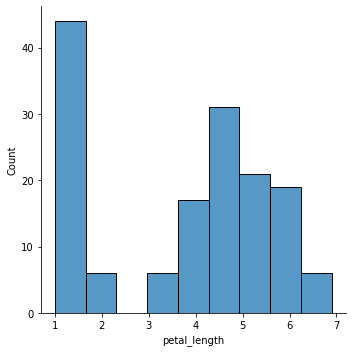

In [21]:
# What does the distribution of petal lengths look like?

sns.displot(iris, x="petal_length")

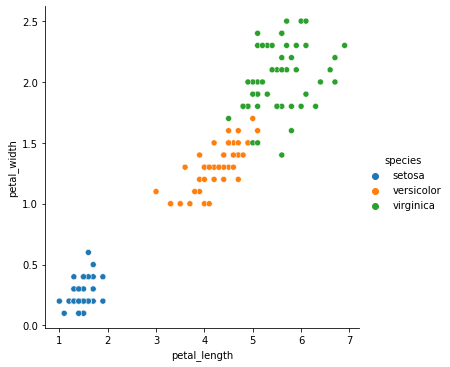

In [7]:
# Is there a correlation between petal length and petal width? Yes, there is clearly a correlation
sns.relplot(x='petal_length', y='petal_width', data=iris, hue="species")

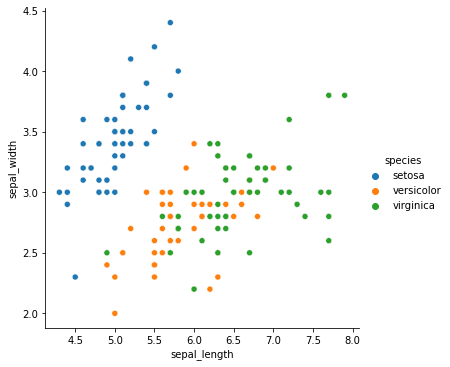

In [24]:
# Would it be reasonable to predict species based on sepal width and sepal length? No, only Setosa definitively clustered 

sns.relplot(x='sepal_length', y='sepal_width', hue='species', data=iris)

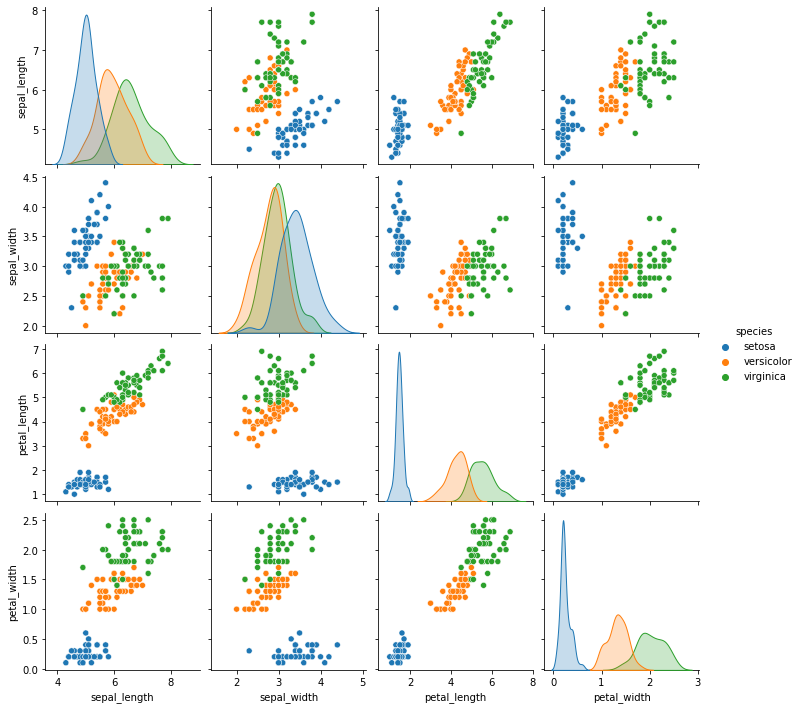

In [6]:
# Which features would be best used to predict species? Petal length vs Petal width
sns.pairplot(iris, hue='species')

In [35]:
# Using the lesson as an example, use seaborn's load_dataset function to load the anscombe data set. Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset. What do you notice?

anscombe = sns.load_dataset('anscombe')
sum_stats = anscombe.groupby('dataset').agg(['max', 'min', 'mean'])
sum_stats

x                y                
          max  min mean    max   min      mean
dataset                                       
I        14.0  4.0  9.0  10.84  4.26  7.500909
II       14.0  4.0  9.0   9.26  3.10  7.500909
III      14.0  4.0  9.0  12.74  5.39  7.500000
IV       19.0  8.0  9.0  12.50  5.25  7.500909

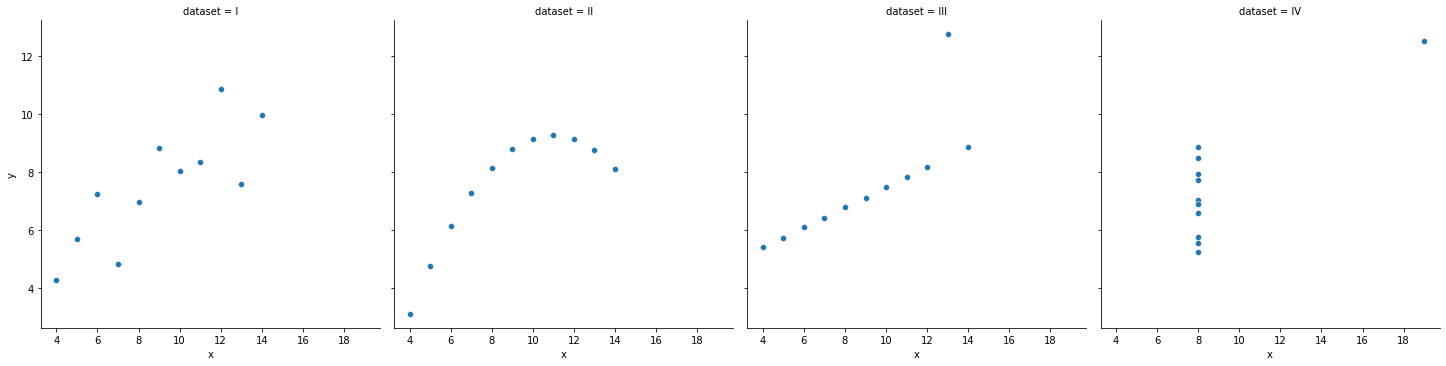

In [44]:
# Plot the x and y values from the anscombe data. Each dataset should be in a separate column.
sns.relplot(data=anscombe,x='x', y='y', col ='dataset')


In [52]:
# Load the InsectSprays dataset and read it's documentation. Create a boxplot that shows the effectiveness of the different insect sprays.

insect_sprays = data("InsectSprays",show_doc=True)


InsectSprays

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Effectiveness of Insect Sprays

### Description

The counts of insects in agricultural experimental units treated with
different insecticides.

### Usage

    InsectSprays

### Format

A data frame with 72 observations on 2 variables.

[,1]

count

numeric

Insect count

[,2]

spray

factor

The type of spray

### Source

Beall, G., (1942) The Transformation of data from entomological field
experiments, _Biometrika_, **29**, 243–262.

### References

McNeil, D. (1977) _Interactive Data Analysis_. New York: Wiley.

### Examples

    require(stats); require(graphics)
    boxplot(count ~ spray, data = InsectSprays,
            xlab = "Type of spray", ylab = "Insect count",
            main = "InsectSprays data", varwidth = TRUE, col = "lightgray")
    fm1 <- aov(count ~ spray, data = InsectSprays)
    summary(fm1)
    opar <- par(mfrow = c(2, 2), oma = c(0, 0, 1.1, 0))
    plot(fm1)
 

<AxesSubplot:xlabel='spray', ylabel='count'>

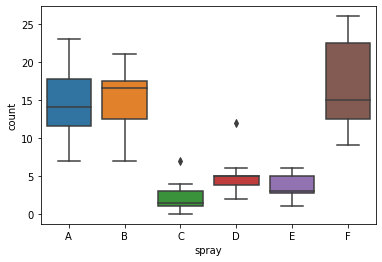

In [67]:
# Load the InsectSprays dataset and read it's documentation. Create a boxplot that shows the effectiveness of the different insect sprays.
insect_sprays = data("InsectSprays")
sns.boxplot(data=insect_sprays, x='spray', y='count')

In [73]:
# Load the swiss dataset and read it's documentation. Create visualizations to answer the following questions:
swiss = data('swiss')
data('swiss', show_doc=True)

swiss

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Swiss Fertility and Socioeconomic Indicators (1888) Data

### Description

Standardized fertility measure and socio-economic indicators for each of 47
French-speaking provinces of Switzerland at about 1888.

### Usage

    data(swiss)

### Format

A data frame with 47 observations on 6 variables, each of which is in percent,
i.e., in [0,100].

[,1] Fertility Ig, "common standardized fertility measure" [,2] Agriculture
[,3] Examination nation [,4] Education [,5] Catholic [,6] Infant.Mortality
live births who live less than 1 year.

All variables but 'Fert' give proportions of the population.

### Source

Project "16P5", pages 549-551 in

Mosteller, F. and Tukey, J. W. (1977) “Data Analysis and Regression: A Second
Course in Statistics”. Addison-Wesley, Reading Mass.

indicating their source as "Data used by permission of Franice van de Walle.
Office of Population Research, Princeton Univer

In [86]:
# Create an attribute named is_catholic that holds a boolean value of whether or not the province is Catholic. (Choose a cutoff point for what constitutes catholic)
swiss['Is_Catholic'] = np.where(swiss.Catholic > 50, 'Is Catholic', 'Not Catholic')
swiss.head(10)


,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,Is_Catholic
Courtelary,80.2,17.0,15,12,9.96,22.2,Not Catholic
Delemont,83.1,45.1,6,9,84.84,22.2,Is Catholic
Franches-Mnt,92.5,39.7,5,5,93.40,20.2,Is Catholic
Moutier,85.8,36.5,12,7,33.77,20.3,Not Catholic
Neuveville,76.9,43.5,17,15,5.16,20.6,Not Catholic
Porrentruy,76.1,35.3,9,7,90.57,26.6,Is Catholic
Broye,83.8,70.2,16,7,92.85,23.6,Is Catholic
Glane,92.4,67.8,14,8,97.16,24.9,Is Catholic
Gruyere,82.4,53.3,12,7,97.67,21.0,Is Catholic
Sarine,82.9,45.2,16,13,91.38,24.4,Is Catholic


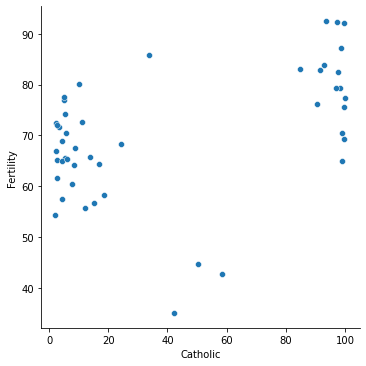

In [81]:
# Does whether or not a province is Catholic influence fertility?  Catholic does appear to influence higher fertility rates
sns.relplot(data=swiss,x='Catholic', y='Fertility')

<AxesSubplot:>

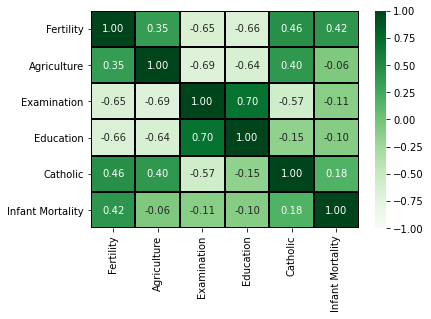

In [113]:
# What measure correlates most strongly with fertility? Catholic correlates most strongly with fertility
labels= ['Fertility', 'Agriculture', 'Examination', 'Education', 'Catholic', 'Infant Mortality']
sns.heatmap(swiss.corr(), cmap = 'Greens',
            vmax=1, vmin=-1, center=0,
            linewidth=1, linecolor='k', annot=True, fmt='.2f',
            xticklabels=labels, yticklabels=labels)


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Chicken Bowl'),
  Text(1, 0, 'Chicken Burrito'),
  Text(2, 0, 'Steak Burrito'),
  Text(3, 0, 'Chips and Guacamole')])

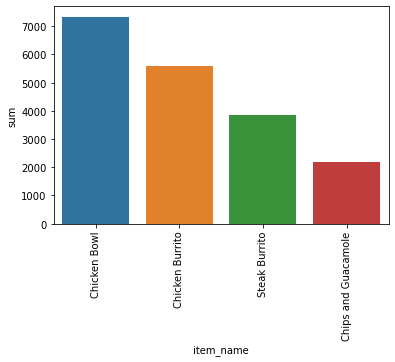

In [189]:
# Using the chipotle dataset from the previous exercise, create a bar chart that shows the 4 most popular items and the revenue produced by each
def get_db_url(host, username, password, database):
    url = f'mysql+pymysql://{username}:{password}@{host}/{database}'
    return url
from env import host, username, password
url = get_db_url(host, username, password, 'chipotle')

orders_df = pd.read_sql('SELECT * FROM orders', url)

orders_df['item_price_flt'] = orders_df.item_price.str[1:].str.replace(',', '').astype('float')
orders_df.groupby('item_name').item_price_flt.agg('sum').sort_values(ascending = False).head(5)
most_pop = orders_df.groupby('item_name').quantity.agg(sum).sort_values(ascending=False).head(4)
revenue = orders_df[orders_df['item_name'].isin(most_pop.index)].groupby('item_name').item_price_flt.agg(['sum']).sort_values(by='sum', ascending=False)
revenue['item_name'] = revenue.index
sns.barplot(x='item_name', y='sum', data=revenue)
plt.xticks(rotation=90, size=10)



In [ ]:
sns.barplot(data=)

In [168]:

# Load the sleepstudy data and read it's documentation. Use seaborn to create a line chart of all the individual subject's reaction times and a more prominant line showing the average change in reaction time.

sleep = data('sleepstudy', show_doc=True)

sleepstudy

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Reaction times in a sleep deprivation study

### Description

The average reaction time per day for subjects in a sleep deprivation study.
On day 0 the subjects had their normal amount of sleep. Starting that night
they were restricted to 3 hours of sleep per night. The observations represent
the average reaction time on a series of tests given each day to each subject.

### Format

A data frame with 180 observations on the following 3 variables.

`Reaction`

Average reaction time (ms)

`Days`

Number of days of sleep deprivation

`Subject`

Subject number on which the observation was made.

### Details

These data are from the study described in Belenky et al. (2003), for the
sleep-deprived group and for the first 10 days of the study, up to the
recovery period.

### References

Gregory Belenky, Nancy J. Wesensten, David R. Thorne, Maria L. Thomas, Helen
C. Sing, Daniel P. Redmond, 

<AxesSubplot:xlabel='Days', ylabel='Reaction'>

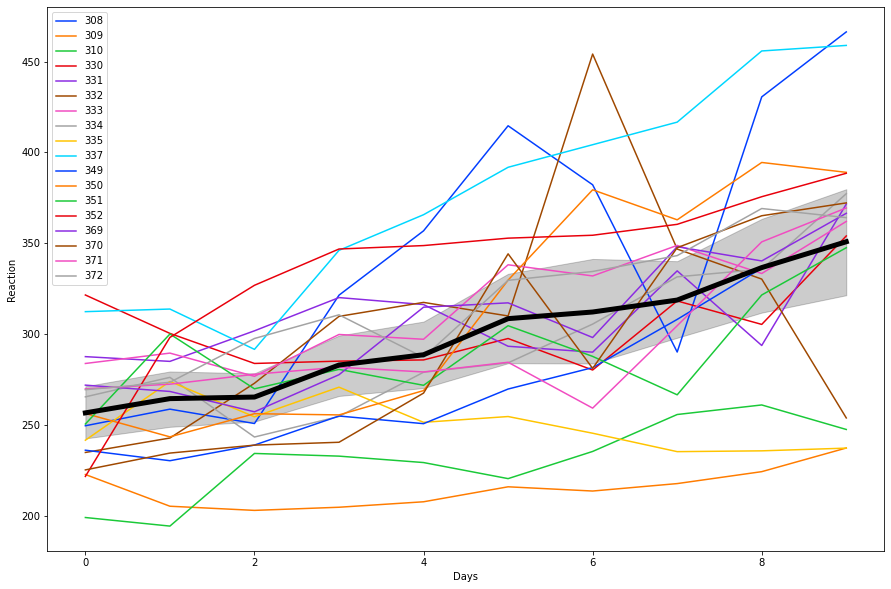

In [212]:
# Load the sleepstudy data and read it's documentation. Use seaborn to create a line chart of all the individual subject's reaction times and a more prominant line showing the average change in reaction time.
sleep = data('sleepstudy')
sleep

plt.figure(figsize=(15, 10))
sns.lineplot(data=sleep, x='Days', y='Reaction', hue='Subject', palette='bright')
sns.lineplot(data = sleep, x = 'Days', y = 'Reaction', color = 'black', estimator = 'mean', linewidth=5)